## Case 2: One generator and two line switches are faulted


Single Line Diagram of system

![alt text](case2.png "Title")

Importing Data and packages

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import params as params
import matplotlib.pyplot as plt

from pypower.api import ppoption, runpf, case14

grid = case14()
ppopt = ppoption(PF_ALG=1)

line_data = pd.DataFrame(grid['branch'],
                     columns=['fbus', 'tbus', 'r', 'x', 'b', 'rateA', 'rateB', 'rateC', 'ratio', 'angle', 'status', 'angmin', 'angmax'])
line_data = line_data.astype({'fbus': int, 'tbus': int, 'status': int})

bus_data = pd.DataFrame(grid['bus'],
                        columns=['bus_i', 'type', 'Pd', 'Qd', 'Gs', 'Bs', 'area', 'Vm', 'Va', 'baseKV', 'zone', 'Vmax', 'Vmin'])
bus_data = bus_data.astype({'bus_i': int, 'type': int})

gen_data = pd.DataFrame(grid['gen'], columns=['bus', 'Pg', 'Qg', 'Qmax', 'Qmin', 'Vg', 'mBase', 'status', 'Pmax', 'Pmin', 'Pc1', 'Pc2',
     'Qc1min', 'Qc1max', 'Qc2min', 'Qc2max', 'ramp_agc', 'ramp_10', 'ramp_30', 'ramp_q', 'apf'])
gen_data = gen_data.astype({'bus': int, 'status': int})

DERs = set(gen_data['bus'])
CLs = set(bus_data['bus_i'][bus_data['Pd'] > 20])

line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.01938,0.05917,0.0528,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
1,1,5,0.05403,0.22304,0.0492,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
2,2,3,0.04699,0.19797,0.0438,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
3,2,4,0.05811,0.17632,0.0340,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
4,2,5,0.05695,0.17388,0.0346,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
5,3,4,0.06701,0.17103,0.0128,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
6,4,5,0.01335,0.04211,0.0000,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
7,4,7,0.00000,0.20912,0.0000,9900.0,0.0,0.0,0.978,0.0,1,-360.0,360.0
8,4,9,0.00000,0.55618,0.0000,9900.0,0.0,0.0,0.969,0.0,1,-360.0,360.0
9,5,6,0.00000,0.25202,0.0000,9900.0,0.0,0.0,0.932,0.0,1,-360.0,360.0


In [2]:
# all_poss = []

# def backtrack(start):
#     if start == 20: return
#     grid['branch'] = line_data.values
#     pf_res, success = runpf(grid)
#     if success:
#         cur = line_data.index[line_data['status'] == 0].to_list()
#         all_poss.append(cur)
#     for i in range(start, 20):
#         line_data.loc[i, 'status'] = 0
#         backtrack(i+1)
#         line_data.loc[i, 'status'] = 1
# backtrack(9)
# mx = max([len(p) for p in all_poss])
# for p in all_poss:
#     if len(p) == mx:
#         print(p)

Possible switching combinations for stable operation of grid

In [3]:
[0, 2, 3, 7, 8, 10]
[0, 2, 3, 7, 9, 10]
[0, 2, 3, 8, 9, 10]
[0, 2, 4, 7, 8, 10]
[0, 2, 4, 8, 9, 10]
[0, 3, 4, 7, 8, 10]
[0, 3, 5, 7, 8, 10]
[0, 3, 5, 8, 9, 10]
[0, 3, 6, 7, 8, 10]
[0, 4, 5, 7, 8, 10]
[0, 5, 6, 7, 8, 10]
[1, 2, 3, 7, 8, 10]
[1, 2, 4, 6, 8, 10]
[1, 2, 4, 7, 8, 10]
[1, 2, 4, 8, 9, 10]
[1, 2, 6, 7, 8, 10]
[1, 2, 6, 7, 9, 10]
[1, 2, 6, 8, 9, 10]
[1, 3, 4, 6, 8, 10]
[1, 3, 4, 7, 8, 10]
[1, 3, 4, 8, 9, 10]
[1, 3, 5, 7, 8, 10]
[1, 3, 5, 8, 9, 10]
[1, 3, 6, 7, 8, 10]
[1, 3, 6, 8, 9, 10]
[1, 4, 5, 6, 8, 10]
[1, 4, 5, 7, 8, 10]
[1, 4, 5, 7, 9, 10]
[1, 4, 5, 8, 9, 10]
[1, 5, 6, 7, 8, 10]
[1, 5, 6, 7, 9, 10]
[1, 5, 6, 8, 9, 10]
[2, 4, 6, 7, 8, 10]
[2, 4, 6, 7, 9, 10]
[2, 4, 6, 8, 9, 10]
[3, 4, 5, 7, 8, 10]
[3, 4, 5, 8, 9, 10]
[3, 4, 6, 7, 8, 10]
[3, 4, 6, 8, 9, 10]
[4, 5, 6, 7, 8, 10]
[4, 5, 6, 7, 9, 10]
[4, 5, 6, 8, 9, 10]

[4, 5, 6, 8, 9, 10]


#### Modification to the standard 14 bus, 5 generator system:
`Switch in the line between bus [(2, 5), (3, 4), (4, 5), (4, 9), (5, 6), (6, 11)] is changed to open from closed.`


In [4]:
line_data.loc[[4, 5, 6, 8, 9, 10], 'status'] = 0
grid['branch'] = line_data.values
line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.01938,0.05917,0.0528,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
1,1,5,0.05403,0.22304,0.0492,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
2,2,3,0.04699,0.19797,0.0438,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
3,2,4,0.05811,0.17632,0.0340,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
4,2,5,0.05695,0.17388,0.0346,9900.0,0.0,0.0,0.000,0.0,0,-360.0,360.0
5,3,4,0.06701,0.17103,0.0128,9900.0,0.0,0.0,0.000,0.0,0,-360.0,360.0
6,4,5,0.01335,0.04211,0.0000,9900.0,0.0,0.0,0.000,0.0,0,-360.0,360.0
7,4,7,0.00000,0.20912,0.0000,9900.0,0.0,0.0,0.978,0.0,1,-360.0,360.0
8,4,9,0.00000,0.55618,0.0000,9900.0,0.0,0.0,0.969,0.0,0,-360.0,360.0
9,5,6,0.00000,0.25202,0.0000,9900.0,0.0,0.0,0.932,0.0,0,-360.0,360.0


Verifying normal operation of system after change using power flow calculation

In [5]:
pf_res, success = runpf(grid)
print('power flow converged') if success else print('power flow did not converge')

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power flow converged in 4 iterations.

Converged in 0.01 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             14     Total Gen Capacity     772.4         -52.0 to 148.0
Generators         5     On-line Capacity       772.4         -52.0 to 148.0
Committed Gens     5     Generation (actual)    294.6             171.6
Loads             11     Load                   259.0              73.5
  Fixed           11       Fixed                259.0              73.5
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             1     Shunt (inj)             -0.0              20.2
Branches          20     Losses (I^2 * Z)        35.58            137.66
Transformers       3     Branc

Adding edges and weights to graph

In [6]:
from utilities import Utils
utils = Utils()
G, status = utils.make_graph(line_data)


Calculating N-1 and N-2 branch resiliency of the network

In [7]:
# Calculation of N-1 branch resiliency
edges = G.edges
networks = []
for u, v in edges:
    G.remove_edge(u, v)
    networks.append(list(G.edges))
    G.add_edge(u, v)

rsl = params.ratio_source_load(networks, CLs, DERs)
ops = params.switch_ops(networks, status)
cen = params.agg_centrality(networks)
obs = params.overlapping_branches(networks)
apl = params.avg_path_length(networks)

df = pd.DataFrame(np.array([rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
df.index = ['rsl', 'ops', 'cen', 'obs', 'apl']
df = df.T
df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
df['resiliency'] = np.exp(-df['wtd_mean'])
print('Resiliency of network considering N-1 branches: ', np.average(df['resiliency']))

# Calculation of N-2 branch Resiliency
networks = []
for i, (u, v) in enumerate(edges):
    G.remove_edge(u, v)
    for j, (l, r) in enumerate(edges):
        if i == j: continue
        G.remove_edge(l, r)
        networks.append(list(G.edges))
        G.add_edge(l, r)
    G.add_edge(u, v)

rsl = params.ratio_source_load(networks, CLs, DERs)
ops = params.switch_ops(networks, status)
cen = params.agg_centrality(networks)
obs = params.overlapping_branches(networks)
apl = params.avg_path_length(networks)

df = pd.DataFrame(np.array([rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
df.index = ['rsl', 'ops', 'cen', 'obs', 'apl']
df = df.T
df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
df['resiliency'] = np.exp(-df['wtd_mean'])
print('Resiliency of network considering N-2 branches: ', np.average(df['resiliency']))

Resiliency of network considering N-1 branches:  0.20071081337187416
Resiliency of network considering N-2 branches:  0.2098215288684022


Visualizing modified network

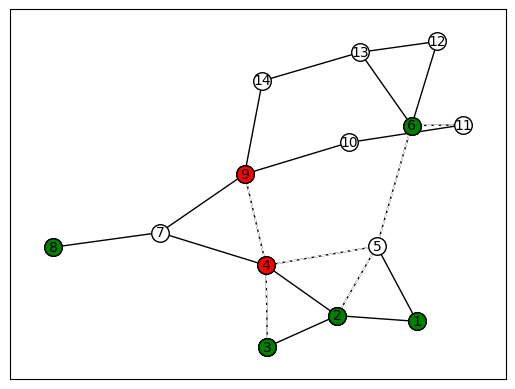

In [8]:
def plot_graph(G):
    pos = nx.layout.fruchterman_reingold_layout(G)
    options={
        'linewidths': 1,
        'edgecolors': 'black',
        'node_size': 160
    }
    nx.draw_networkx_nodes(G, pos, bus_data['bus_i'], node_color='white', **options)
    nx.draw_networkx_nodes(G, pos, CLs, node_color='red', **options)
    nx.draw_networkx_nodes(G, pos, DERs, node_color='green', **options)
    nx.draw_networkx_edges(G, pos, G.edges)
    nx.draw_networkx_edges(G, pos, [edge for edge in G.edges if status[edge] == 0], edge_color = 'white', style='dashed')
    nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=10)
    plt.show()
plot_graph(G)

#### Simulating Contingency:
`Generator at bus 8 and Switch in the line between bus 2 and 4, 13 and 14 is faulted resulting in islanding of critical load at bus 4 and 9.`

In [9]:
bus_data = bus_data.drop(7)
grid['bus'] = bus_data.values
gen_data = gen_data.drop(4)
grid['gen'] = gen_data.values
DERs.remove(8)
line_data = line_data[(line_data.tbus != 8) & (line_data.fbus != 8)]
line_data = line_data.drop([3, 19])
grid['branch'] = line_data.values
line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.01938,0.05917,0.0528,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
1,1,5,0.05403,0.22304,0.0492,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
2,2,3,0.04699,0.19797,0.0438,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
4,2,5,0.05695,0.17388,0.0346,9900.0,0.0,0.0,0.000,0.0,0,-360.0,360.0
5,3,4,0.06701,0.17103,0.0128,9900.0,0.0,0.0,0.000,0.0,0,-360.0,360.0
6,4,5,0.01335,0.04211,0.0000,9900.0,0.0,0.0,0.000,0.0,0,-360.0,360.0
7,4,7,0.00000,0.20912,0.0000,9900.0,0.0,0.0,0.978,0.0,1,-360.0,360.0
8,4,9,0.00000,0.55618,0.0000,9900.0,0.0,0.0,0.969,0.0,0,-360.0,360.0
9,5,6,0.00000,0.25202,0.0000,9900.0,0.0,0.0,0.932,0.0,0,-360.0,360.0
10,6,11,0.09498,0.19890,0.0000,9900.0,0.0,0.0,0.000,0.0,0,-360.0,360.0


Visualizing the network after contingency

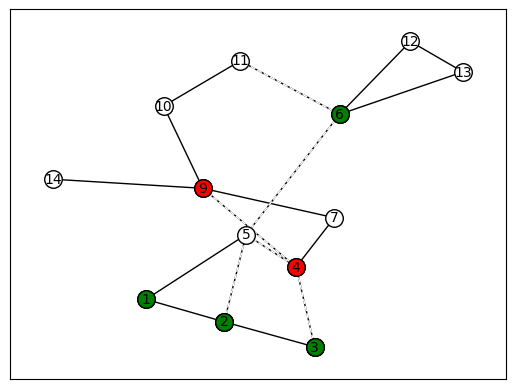

In [10]:
G, status = utils.make_graph(line_data)
plot_graph(G)

Power flow analysis of the network after contingency

In [11]:
try:
    pf_res, success = runpf(grid)
    print('Power flow converged') if success else print('Power flow did not converge')
except:
    print('Power flow did not converge')

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)

dgstrf info 16

Newton's method power did not converge in 10 iterations.

Did not converge (0.03 seconds)

|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             13     Total Gen Capacity     672.4         -46.0 to 124.0
Generators         4     On-line Capacity       672.4         -46.0 to 124.0
Committed Gens     4     Generation (actual)      nan               nan
Loads             11     Load                   259.0              73.5
  Fixed           11       Fixed                259.0              73.5
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             1     Shunt (inj)              nan               nan
Branches          17     Losses (I^2 * Z)          nan               nan
Trans

/Users/kakiku/BTP/.venv/lib/python3.11/site-packages/pypower/newtonpf.py:100: MatrixRankWarning: Matrix is exactly singular
  dx = -1 * spsolve(J, F)


dgstrf info 1
dgstrf info 1
dgstrf info 1
dgstrf info 1
dgstrf info 1
dgstrf info 1
dgstrf info 1


### Finding Networks to restore the islanded critical node

Finding all simple paths from each critical load to each source

In [12]:
path_list = utils.find_path_list(G, CLs, DERs)

All possible path combination calculation

In [13]:
FNs, raw_combs = utils.path_combinations(path_list)

### Calculating parameters to measure resiliency of possible network

Calculation of Parameter matrix

In [14]:
id = range(len(FNs))
rsl = params.ratio_source_load(FNs, CLs, DERs)
ops = params.switch_ops(FNs, status)
cen = params.agg_centrality(FNs)
obs = params.overlapping_branches(FNs)
apl = params.avg_path_length(raw_combs)

df = pd.DataFrame(np.array([id, rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
df.index = ['id', 'rsl', 'ops', 'cen', 'obs', 'apl']
df = df.T
df = df.astype({'id': int})
print(df)

     id  rsl  ops       cen  obs  apl
FN1   0  1.0  2.0  0.238095  0.0  2.5
FN2   1  2.0  3.0  0.333333  0.0  2.5


Calculation of weighted mean and resiliency

In [15]:
df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
df['resiliency'] = np.exp(-df['wtd_mean'])
print(df.sort_values('resiliency', ascending=False))

     id  rsl  ops       cen  obs  apl  wtd_mean  resiliency
FN1   0  1.0  2.0  0.238095  0.0  2.5  1.236905    0.290281
FN2   1  2.0  3.0  0.333333  0.0  2.5  1.691667    0.184212


Comparing line data before and after switching to the suggested network

In [16]:
for network in FNs:
    tmp_line = line_data
    for u, v in network:
        tmp_line.loc[(tmp_line.fbus == u) & (tmp_line.tbus == v), 'status'] = 1
        tmp_line.loc[(tmp_line.fbus == v) & (tmp_line.tbus == u), 'status'] = 1
    grid['branch'] = tmp_line.values
    pf_res, success = runpf(grid)
    if success:
        print(line_data[['fbus', 'tbus', 'r', 'x', 'status']])
        line_data = tmp_line
        break
print('-----------------------------------------------------------', '\n')
print(line_data[['fbus', 'tbus', 'r', 'x', 'status']])

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power did not converge in 10 iterations.

Did not converge (0.01 seconds)

|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             13     Total Gen Capacity     672.4         -46.0 to 124.0
Generators         4     On-line Capacity       672.4         -46.0 to 124.0
Committed Gens     4     Generation (actual)    285.5             173.4
Loads             11     Load                   259.0              73.5
  Fixed           11       Fixed                259.0              73.5
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             1     Shunt (inj)             -0.0              16.8
Branches          17     Losses (I^2 * Z)        30.73            138.81
Transformers       3

Visualizing network having highest resiliency with operation feasibility

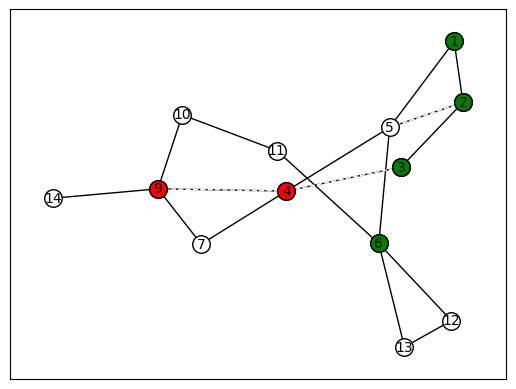

In [17]:
G, status = utils.make_graph(line_data)
plot_graph(G)

Critical loads at bus 4 and 9 are successfully restored